# Digital Assignment 2, Vishhvak Srinivasan, 16BCE1269
## Clustering Algorithms

In [1]:
from IPython.display import Image
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
X, y = make_blobs(n_samples=300, 
                  n_features=4, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=1)

In [3]:
df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'x3':X[:,2], 'x4':X[:,3], 'y':y})
df

x1        x2         x3        x4  y
0   -1.799109  5.217914  -9.991036 -4.300695  0
1   -2.171644  1.349298  -0.500973  3.430010  2
2   -1.870988  4.449722 -11.068946 -4.368433  0
3   -7.883607 -6.173927  -5.950474 -3.035114  1
4   -7.319368 -8.236471  -5.562989 -2.636786  1
5   -6.809413 -7.297897  -6.257324 -2.361827  1
6   -7.795584 -8.411402  -6.099237 -3.123171  1
7   -7.272306 -7.927255  -7.064374 -3.503099  1
8   -2.721751  0.655434  -1.620710  4.037695  2
9   -2.334167  1.098385  -1.524293  3.661177  2
10  -1.751062  0.857739  -1.471801  3.733544  2
11  -6.621969 -8.058297  -5.875764 -3.139751  1
12  -1.812662  4.820477  -9.882665 -3.572343  0
13  -0.707231  4.962018  -9.668188 -4.767068  0
14  -7.310445 -8.086042  -6.408981 -3.154623  1
15  -1.724161  1.657639  -1.794867  3.965718  2
16  -2.559133  0.301403  -2.277982  3.812556  2
17  -2.217795  4.446953 -10.091002 -3.981761  0
18  -0.754292  3.753626 -10.170206 -4.068768  0
19  -2.448552  0.594066  -1.845969  4.557132  2
20  -1.634156  4.087992  -9.902255 -2.903221  0
21  -1.752845  4.355617  -9.563269 -3.578143  0
22  -7.164381 -7.219992  -6.484265 -3.328378  1
23  -1.926818 -0.105290  -0.922123  3.817490  2
24  -6.878654 -8.227473  -6.366496 -2.538285  1
25  -1.859999  4.818493 -10.278865 -2.975910  0
26  -1.572644  0.496494  -0.926231  4.005615  2
27  -1.209132  4.064626 -10.059158 -4.421233  0
28  -6.572406 -7.617602  -6.823373 -2.669468  1
29  -1.413392  4.066151 -10.039967 -4.102029  0
..        ...       ...        ...       ... ..
270 -6.839074 -7.601141  -6.415664 -2.060608  1
271 -8.103283 -7.679478  -6.526783 -3.079808  1
272 -7.118112 -9.548726  -6.502855 -3.578731  1
273 -7.469306 -7.874508  -6.184276 -2.535198  1
274 -2.269432  5.631174 -10.270600 -4.052767  0
275 -1.347879  4.189012  -9.293943 -3.888798  0
276 -6.343444 -8.423069  -6.210607 -2.208578  1
277 -7.493631 -8.620319  -6.003473 -4.067870  1
278 -1.792669  4.422797 -10.684271 -3.795769  0
279 -7.589416 -7.994899  -7.222429 -3.043921  1
280 -1.905643  0.331199  -1.560441  3.694629  2
281 -1.280157  4.848944 -10.436353 -4.387242  0
282 -7.132279 -7.628619  -5.791685 -2.725827  1
283 -1.348658  4.106588  -9.436006 -3.800715  0
284 -7.303673 -8.140228  -6.949144 -2.437518  1
285 -6.746590 -7.448601  -5.464340 -3.491878  1
286 -2.150371  0.869803  -1.743536  3.633935  2
287 -0.395397  4.282172  -9.975878 -4.066506  0
288 -6.674869 -8.467949  -6.831514 -3.122490  1
289 -1.233208  4.424170 -10.767109 -4.177296  0
290 -6.800442 -9.271771  -6.828652 -3.097645  1
291 -2.381853  0.513783  -1.422242  3.526991  2
292 -6.868328 -9.065188  -5.691258 -3.108620  1
293 -2.598589  0.737995  -1.329628  3.933364  2
294 -7.277129 -8.518994  -7.057665 -2.581874  1
295 -2.012624  1.040336  -1.773392  3.031885  2
296 -6.644451 -8.204672  -5.701346 -3.113637  1
297 -3.056102  5.375254  -9.814546 -4.475643  0
298 -1.727549  4.007855  -9.856375 -4.366397  0
299 -1.411954  4.319138  -9.504545 -3.846582  0

[300 rows x 5 columns]

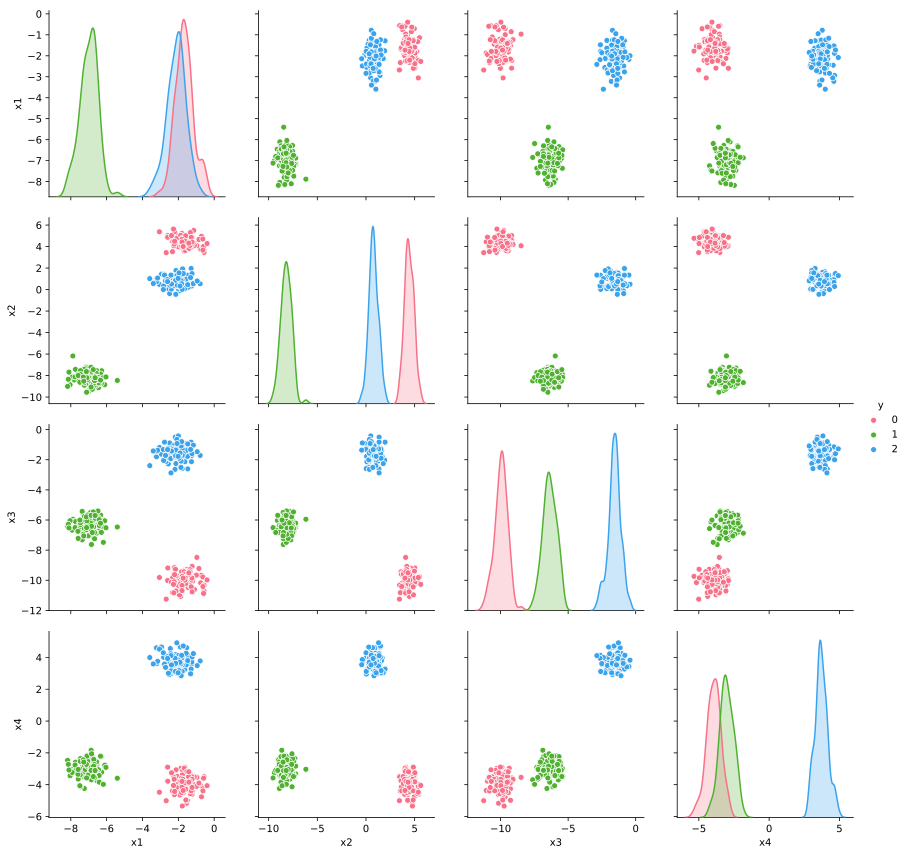

In [4]:
sns.pairplot(df, height=3,vars=['x1','x2','x3','x4'],hue="y",palette="husl")

As we can see, the pairplot shows us different feature vs feature plot with 4 clusters, with a good amount of cluster separation as we specified the std dev as 0.5

Choosing x1 vs x4 from the pair plot as it showcases clusters with least overlap and maximum separation below.

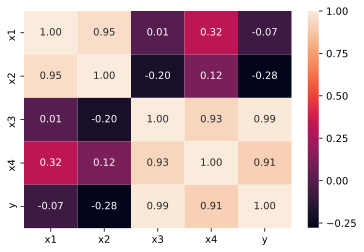

In [5]:
heat = sns.heatmap(df.corr(),annot=True, fmt='.2f')

# Kmeans 

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
print(km.inertia_)

286.7692594120084


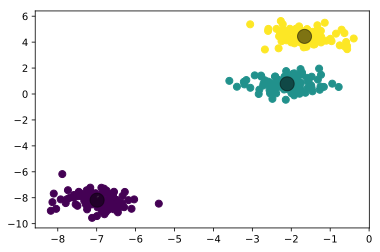

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

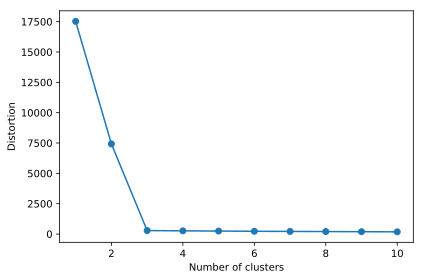

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

Clearly, 3 is the ideal number of clusters from the elbow plot.

Above data is not what we often see in real life datasets, i.e they are not evenly separated and grouped as clusters. Let us generate a more realistic dataset and compare the results of kmeans in both cases.

In [9]:
X_m, y_m = make_classification(n_samples=2000,
                                          n_features=10,
                                          n_classes=3,
                                          n_clusters_per_class=1,
                                          class_sep=1.5,
                                          flip_y=0.1,
                                          shuffle=False,
                                          random_state=301)

In [10]:
dfm = pd.DataFrame({'x1':X_m[:,0], 'x2':X_m[:,1], 'x3':X_m[:,2], 'y':y_m})
dfm

x1        x2        x3  y
0     1.849892 -0.633374  1.086057  0
1    -0.100357 -4.172182  2.317431  0
2     2.612437  0.291628  0.863700  0
3     2.153560 -0.605377  1.189786  0
4     1.681470 -1.239574  1.362206  0
5     1.456381 -1.375687  1.350488  0
6     1.665063 -0.838411  1.129123  0
7     2.056869 -0.675233  1.191185  0
8     2.033587 -0.510609  1.089020  0
9     0.511967 -2.159014  1.421212  0
10    2.092414 -0.952992  1.362089  0
11    1.898608 -1.626230  1.666116  0
12    1.233254 -0.435708  0.731638  0
13    1.708167  0.579210  0.345253  0
14    2.083129 -0.890774  1.323285  0
15    1.132075 -2.907187  2.087989  0
16    2.095877 -1.215205  1.511580  0
17    2.313901 -0.572276  1.234209  0
18    0.997052 -2.314274  1.699886  0
19    1.704282 -1.678018  1.618872  0
20    0.338870 -3.744007  2.248460  0
21    1.917449 -0.274529  0.909934  0
22    1.307315  0.733350  0.100372  0
23    1.589639 -1.088421  1.240666  0
24    0.813859 -2.427916  1.691967  0
25    2.187798 -0.897379  1.368222  0
26    1.884136 -1.981791  1.861282  1
27    2.165365  0.003830  0.850282  0
28    1.683803 -0.872605  1.155817  0
29    1.567714 -1.958294  1.723441  0
...        ...       ...       ... ..
1970 -1.239533 -1.141421  0.156838  2
1971 -2.111548 -0.659295 -0.458812  2
1972 -1.274785 -1.925918  0.586137  2
1973 -2.543918 -0.454946 -0.744465  2
1974 -0.375264 -2.403330  1.209952  2
1975 -1.552589 -1.567291  0.274178  0
1976 -2.165746 -0.419070 -0.615855  2
1977 -2.932135 -1.041552 -0.565911  2
1978 -0.921326 -1.284890  0.363156  2
1979 -1.275140 -0.814733 -0.041731  2
1980  0.161838 -1.360850  0.832479  2
1981 -0.750959 -2.722759  1.242502  2
1982 -1.269740 -1.944859  0.598823  2
1983 -2.939286 -2.086257  0.021446  2
1984 -2.103244 -2.081717  0.348008  2
1985 -2.516950 -0.952321 -0.452872  2
1986 -1.477979 -2.731858  0.961435  2
1987 -2.241793 -0.128343 -0.810030  2
1988 -1.866458 -1.973195  0.379919  2
1989 -2.906791 -0.380941 -0.929125  2
1990 -1.980244 -1.218043 -0.091474  2
1991 -0.586188 -0.420355  0.006700  2
1992 -0.961200 -2.177135  0.851504  2
1993 -1.282998 -1.194911  0.169945  2
1994 -1.747227 -2.069133  0.481054  2
1995 -2.372113 -1.343460 -0.174892  2
1996 -0.851561 -2.241452  0.930999  2
1997 -1.499223 -1.884896  0.474607  2
1998 -2.634203 -0.346833 -0.841082  2
1999 -1.543411 -1.338052  0.148290  2

[2000 rows x 4 columns]

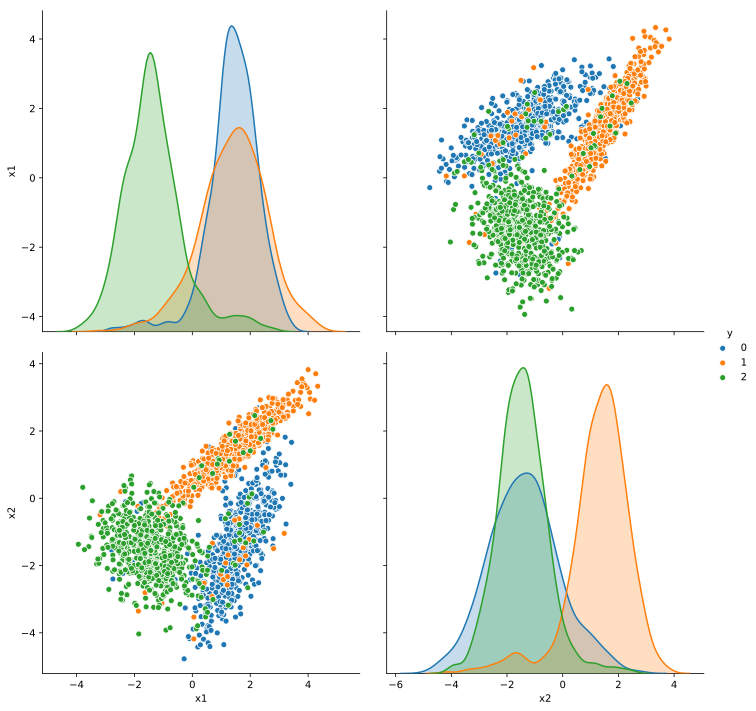

In [11]:
sns.pairplot(dfm, height=5, vars=['x1','x2'], hue='y')

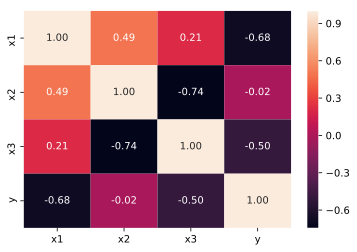

In [12]:
heat = sns.heatmap(dfm.corr(),annot=True, fmt='.2f')

In [13]:
from sklearn.cluster import KMeans

kmm = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_kmm = km.fit_predict(X_m)
print(km.inertia_)

12251.200496387079


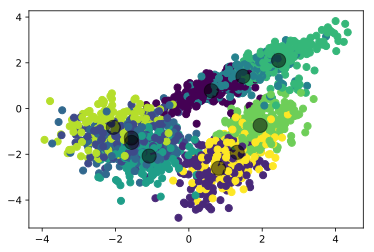

In [14]:
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_kmm, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

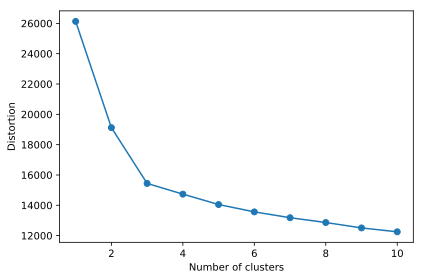

In [15]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X_m)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

We can observe that the distortion in this case is really high, 1000 times more, if we take a dataset that is comparable to realtime data, and even though we take the ideal number of clusters (3) from the elbow plot, the inertia doesn't decrease. This can be due to the large amount of data, the overlap in clusters as shown in the pairplot and the lack of a good amount of separation between the clusters. The lack of good correlation between values can also lead to the same situation as the clusters will not be distinct in that case.

# Agglomerative Clustering

Here we try to use a bottom up approach, where we consider each point to be a unique cluister at first, then calculate distances between each other using a metric (usually euclidean), and group them based on a threshold into larger and larger clusters, reducing the cluster number till it becomes one huge cluster.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [17]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [18]:
clt = AgglomerativeClustering(linkage='complete', 
                              affinity='euclidean', 
                              n_clusters=3)
agnes = clt.fit(X_std)

In [19]:
y=agnes.labels_
y

array([2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2,
       0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2,
       2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 0, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       2, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2])

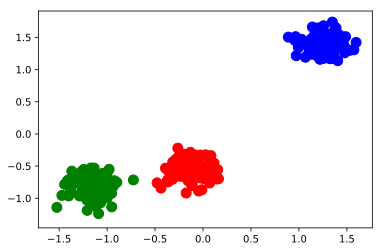

In [20]:
plt.scatter(X_std[y == 0, 2], X_std[y == 0,3],s=100,c='red',label='0')
plt.scatter(X_std[y == 1, 2], X_std[y == 1,3],s=100,c='blue',label='1')
plt.scatter(X_std[y == 2, 2], X_std[y == 2,3],s=100,c='green',label='2')

As we can see, this is dentical to the result we had got from kmeans as well for our first dataset.

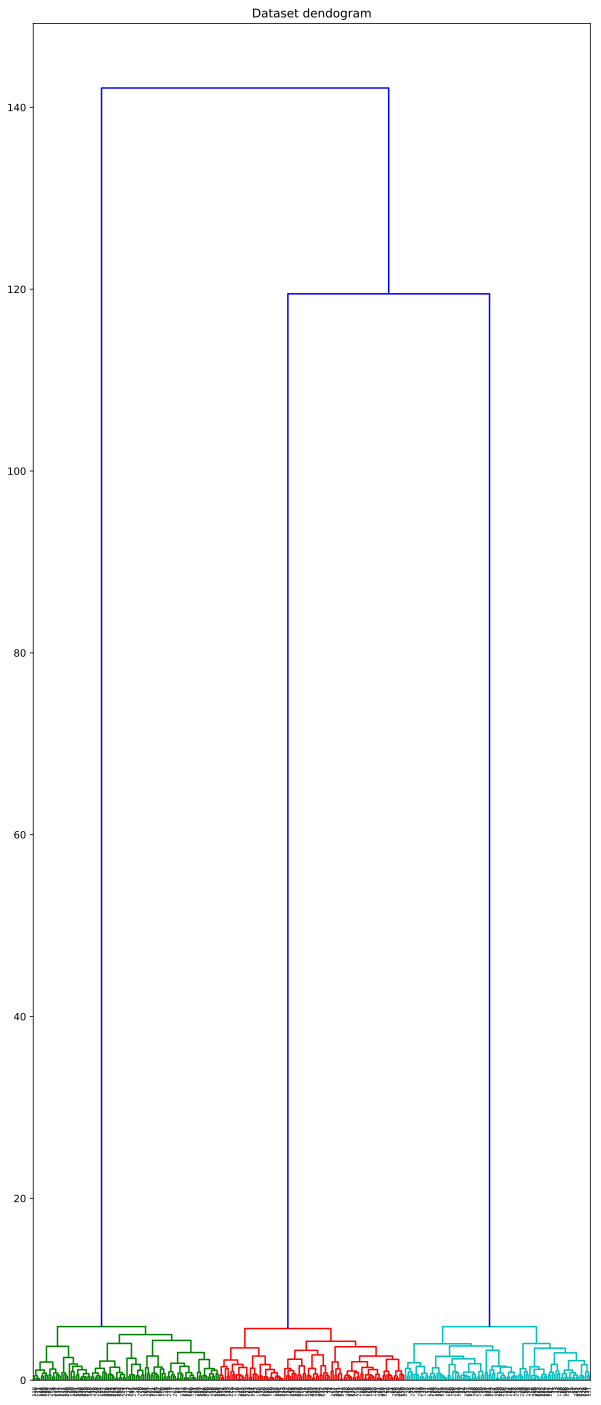

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 25))  
#plt.savefig('dendogram.png', dpi=300)
plt.title("Dataset dendogram")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  

As shown in the dendogram, the longest horizontal line across the vertical lines will be between the 3 blue lines, therefore indicating that the ideal number of clusters is 3, similar to our kmeans elbow plot.

In [22]:
clt = AgglomerativeClustering(linkage='complete', 
                              affinity='euclidean', 
                              n_clusters=3)
agnes = clt.fit(X_m)

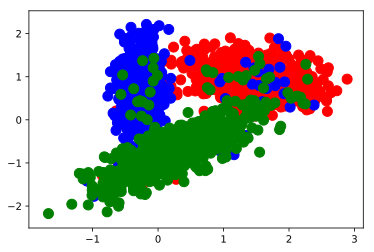

In [23]:
plt.scatter(X_m[y_m == 0, 2], X_m[y_m == 0,3],s=100,c='red',label='0')
plt.scatter(X_m[y_m == 1, 2], X_m[y_m == 1,3],s=100,c='blue',label='1')
plt.scatter(X_m[y_m == 2, 2], X_m[y_m == 2,3],s=100,c='green',label='2')

As we can see, there is a lot of overlap and clustering is not very efficient in producing unique distinct clusters, indicating that the data is poorly correlated with the features

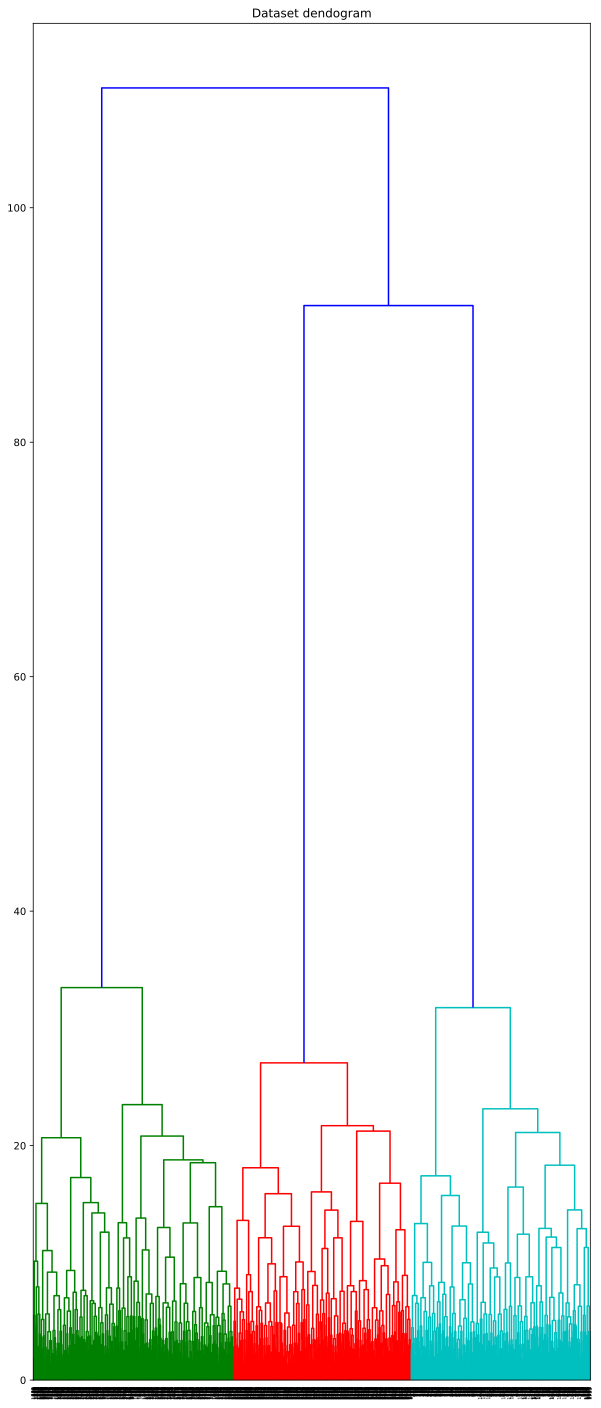

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 25))  
#plt.savefig('dendogram.png', dpi=300)
plt.title("Dataset dendogram")  
dend = shc.dendrogram(shc.linkage(X_m, method='ward'))  

The height of the dendogram is higher, indicating the lifetime being higher as well. There are too many splits at the bottom showing that the overlap is indeed signficant, and that there is a good amount of noise in this dataset, matching our previous observation obtained from the graphs.

In [36]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches

import numpy as np


class SOM:

    def __init__(self, net_x_dim, net_y_dim, num_features):
        """

        :param net_x_dim: size of net (x)
        :param net_y_dim:  size of net (y)
        :param num_features: number of features in input data
        :return:
        """
        self.network_dimensions = np.array([net_x_dim, net_y_dim])
        self.init_radius = min(self.network_dimensions[0], self.network_dimensions[1])
        # initialize weight vectors
        self.num_features = num_features
        self.initialize()

    def initialize(self):
        self.net = np.random.random((self.network_dimensions[0], self.network_dimensions[1], self.num_features))

    def train(self, data, num_epochs=100, init_learning_rate=0.01, resetWeights=False):
        """
        :param data: the data to be trained
        :param num_epochs: number of epochs (default: 100)
        :param init_learning_rate: initial learning rate (default: 0.01)
        :return:
        """
        if resetWeights:
            self.initialize()
        num_rows = data.shape[0]
        indices = np.arange(num_rows)
        self.time_constant = num_epochs / np.log(self.init_radius)

        # visualization
        if self.num_features == 3:
            fig = plt.figure()
        else:
            fig = None
        # for (epoch = 1,..., Nepochs)
        for i in range(1, num_epochs + 1):
            # interpolate new values for α(t) and σ (t)
            radius = self.decay_radius(i)
            learning_rate = self.decay_learning_rate(init_learning_rate, i, num_epochs)
            # visualization
            vis_interval = int(num_epochs/10)
            if i % vis_interval == 0:
                if fig is not None:
                    self.show_plot(fig, i/vis_interval, i)
                print("SOM training epoches %d" % i)
                print("neighborhood radius ", radius)
                print("learning rate ", learning_rate)
                print("-------------------------------------")

            # shuffling data
            np.random.shuffle(indices)

            # for (record = 1,..., Nrecords)
            for record in indices:
                row_t = data[record, :]

                # find its Best Matching Unit
                bmu, bmu_idx = self.find_bmu(row_t)
                # for (k = 1,..., K)
                for x in range(self.network_dimensions[0]):
                    for y in range(self.network_dimensions[1]):
                        weight = self.net[x, y, :].reshape(1, self.num_features)
                        w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
                        # if the distance is within the current neighbourhood radius
                        if w_dist <= radius ** 2:
                            # update weight vectors wk using Eq. (3)
                            influence = SOM.calculate_influence(w_dist, radius)
                            new_w = weight + (learning_rate * influence * (row_t - weight))
                            self.net[x, y, :] = new_w.reshape(1, self.num_features)
        if fig is not None:
            plt.show()

    @staticmethod
    def calculate_influence(distance, radius):
        return np.exp(-distance / (2 * (radius ** 2)))

    def find_bmu(self, row_t):
        """
            Find the best matching unit for a given vector, row_t, in the SOM
            Returns: a (bmu, bmu_idx) tuple where bmu is the high-dimensional Best Matching Unit
                     and bmu_idx is the index of this vector in the SOM
        """
        bmu_idx = np.array([0, 0])
        # set the initial minimum distance to a huge number
        min_dist = np.iinfo(np.int).max
        # calculate the high-dimensional distance between each neuron and the input
        # for (k = 1,..., K)
        for x in range(self.network_dimensions[0]):
            for y in range(self.network_dimensions[1]):
                weight_k = self.net[x, y, :].reshape(1, self.num_features)
                # compute distances dk using Eq. (1)
                sq_dist = np.sum((weight_k - row_t) ** 2)
                # compute winning node c using Eq. (2)
                if sq_dist < min_dist:
                    min_dist = sq_dist
                    bmu_idx = np.array([x, y])
        # get vector corresponding to bmu_idx
        bmu = self.net[bmu_idx[0], bmu_idx[1], :].reshape(1, self.num_features)
        return bmu, bmu_idx

    def predict(self, data):
        # find its Best Matching Unit
        bmu, bmu_idx = self.find_bmu(data)
        return bmu, bmu_idx

    def decay_radius(self, iteration):
        return self.init_radius * np.exp(-iteration / self.time_constant)

    def decay_learning_rate(self, initial_learning_rate, iteration, num_iterations):
        return initial_learning_rate * np.exp(-iteration / num_iterations)

    def show_plot(self, fig, position, epoch):
        # setup axes
        ax = fig.add_subplot(2, 5, position, aspect="equal")
        ax.set_xlim((0, self.net.shape[0] + 1))
        ax.set_ylim((0, self.net.shape[1] + 1))
        ax.set_title('Ep: %d' % epoch)

        # plot the rectangles
        for x in range(1, self.net.shape[0] + 1):
            for y in range(1, self.net.shape[1] + 1):
                ax.add_patch(patches.Rectangle((x - 0.5, y - 0.5), 1, 1,
                                               facecolor=self.net[x - 1, y - 1, :],
                                               edgecolor='none'))


In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

# reading data
input_data = pd.read_csv("Area.csv")
# visualize some data
input_data.iloc[:30,:]

Year AD  Year BS     Crop    Area  Production  Yield
0     1984/85  2041/42  OILSEED  127820       84030    657
1     1985/86  2042/43  OILSEED  137920       78390    568
2     1986/87  2043/44  OILSEED  142890       82500    577
3     1987/88  2044/45  OILSEED  151490       94370    623
4     1988/89  2045/46  OILSEED  154860       99190    641
5     1989/90  2046/47  OILSEED  153660       98060    638
6     1990/91  2047/48  OILSEED  156310       92140    589
7     1991/92  2048/49  OILSEED  154570       87840    568
8     1992/93  2049/50  OILSEED  165240       93690    567
9     1993/94  2050/51  OILSEED  177486      107535    606
10    1994/95  2051/52  OILSEED  184460      116300    630
11    1995/96  2052/53  OILSEED  185000      115990    627
12    1996/97  2053/54  OILSEED  182110      119250    655
13    1997/98  2054/55  OILSEED  179216      110226    615
14    1998/99  2055/56  OILSEED  190429      119731    629
15  1999/2000  2056/57  OILSEED  189629      122751    647
16  2000/2001  2057/58  OILSEED  188455      132331    702
17  2001/2002  2058/59  OILSEED  187820      134950    719
18  2002/2003  2059/60  OILSEED  186720      124931    669
19  2003/2004  2060/61  OILSEED  186741      132865    711
20  2004/2005  2061/62  OILSEED  187823      141989    756
21    1984/85  2041/42   POTATO   65540      420160   6411
22    1985/86  2042/43   POTATO   69960      356720   5099
23    1986/87  2043/44   POTATO   74310      395110   5317
24    1987/88  2044/45   POTATO   80180      566950   7071
25    1988/89  2045/46   POTATO   81570      640910   7857
26    1989/90  2046/47   POTATO   83350      671810   8060
27    1990/91  2047/48   POTATO   84280      738030   8757
28    1991/92  2048/49   POTATO   85300      732860   8592
29    1992/93  2049/50   POTATO   87020      733300   8427

In [38]:
agri_data = input_data.iloc[np.random.permutation(len(input_data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:20,:]

Area  Production  Yield
19   186741      132865    711
16   188455      132331    702
23    74310      395110   5317
64    23010      558340  24265
74    44820     1568700  35000
96    11000       14000   1273
60     3597        3460    962
73    43583     1469214  33711
89    13000       16000   1231
67    29550      903010  30559
5    153660       98060    638
58     4226        3973    940
33   110850      997400   8998
102   11851       17035   1437
69    32960     1105960  33555
1    137920       78390    568
17   187820      134950    719
78    58126     2103426  36187
59     3813        3763    987
91    15000       19000   1267

In [39]:
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:10,:]

Area  Production     Yield
19  0.980633    0.055917  0.017679
16  0.989634    0.055692  0.017455
23  0.390224    0.166285  0.132208
64  0.120832    0.234981  0.603352
74  0.235363    0.660199  0.870279
96  0.057764    0.005892  0.031653
60  0.018889    0.001456  0.023920
73  0.228867    0.618329  0.838228
89  0.068267    0.006734  0.030609
67  0.155176    0.380038  0.759853

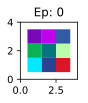

In [40]:
agri_som = SOM(3,3,3)
# Initial weights
init_fig = plt.figure()
agri_som.show_plot(init_fig, 1, 0)
plt.show()

SOM training epoches 20
neighborhood radius  2.6878753795222865
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  2.4082246852806923
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  2.157669279974593
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  1.9331820449317627
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  1.7320508075688772
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  1.5518455739153598
learning rate  0.005488116360940265
-------------------------------------
SOM training epoches 140
neighborhood radius  1.3903891703159093
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
neighbo

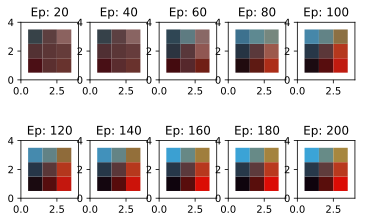

In [41]:
agri_som.train(trunc_data.values,
          num_epochs=200,
          init_learning_rate=0.01
          )

In [42]:
def predict(df):
    bmu, bmu_idx = agri_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df = trunc_data.apply(predict, axis=1)
clustered_df.iloc[0:20]

Area  Production     Yield  \
19   0.980633    0.055917  0.017679   
16   0.989634    0.055692  0.017455   
23   0.390224    0.166285  0.132208   
64   0.120832    0.234981  0.603352   
74   0.235363    0.660199  0.870279   
96   0.057764    0.005892  0.031653   
60   0.018889    0.001456  0.023920   
73   0.228867    0.618329  0.838228   
89   0.068267    0.006734  0.030609   
67   0.155176    0.380038  0.759853   
5    0.806915    0.041269  0.015864   
58   0.022192    0.001672  0.023373   
33   0.582107    0.419763  0.223736   
102  0.062233    0.007169  0.035731   
69   0.173083    0.465451  0.834349   
1    0.724259    0.032991  0.014123   
17   0.986299    0.056795  0.017878   
78   0.305237    0.885242  0.899794   
59   0.020023    0.001584  0.024542   
91   0.078770    0.007996  0.031504   

                                                   bmu bmu_idx  
19   [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
16   [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
23   [[0.3722314430999858, 0.23632027572530256, 0.2...  [1, 1]  
64   [[0.15338368855839837, 0.2202065928854864, 0.2...  [0, 1]  
74   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
96   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
60   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
73   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
89   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
67   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
5    [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
58   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
33   [[0.6565395014936192, 0.5293752589954412, 0.24...  [2, 2]  
102  [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
69   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
1    [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
17   [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
78   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
59   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
91   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]

In [43]:
joined_df = agri_data.join(clustered_df, rsuffix="_norm")
joined_df[0:20]

Year AD  Year BS       Crop    Area  Production  Yield  Area_norm  \
19   2003/2004  2060/61    OILSEED  186741      132865    711   0.980633   
16   2000/2001  2057/58    OILSEED  188455      132331    702   0.989634   
23     1986/87  2043/44     POTATO   74310      395110   5317   0.390224   
64     1985/86  2042/43  SUGARCANE   23010      558340  24265   0.120832   
74     1995/96  2052/53  SUGARCANE   44820     1568700  35000   0.235363   
96     1996/97  2053/54       JUTE   11000       14000   1273   0.057764   
60   2002/2003  2059/60    TOBACCO    3597        3460    962   0.018889   
73     1994/95  2051/52  SUGARCANE   43583     1469214  33711   0.228867   
89     1989/90  2046/47       JUTE   13000       16000   1231   0.068267   
67     1988/89  2045/46  SUGARCANE   29550      903010  30559   0.155176   
5      1989/90  2046/47    OILSEED  153660       98060    638   0.806915   
58   2000/2001  2057/58    TOBACCO    4226        3973    940   0.022192   
33     1996/97  2053/54     POTATO  110850      997400   8998   0.582107   
102  2002/2003  2059/60       JUTE   11851       17035   1437   0.062233   
69     1990/91  2047/48  SUGARCANE   32960     1105960  33555   0.173083   
1      1985/86  2042/43    OILSEED  137920       78390    568   0.724259   
17   2001/2002  2058/59    OILSEED  187820      134950    719   0.986299   
78   1999/2000  2056/57  SUGARCANE   58126     2103426  36187   0.305237   
59   2001/2002  2058/59    TOBACCO    3813        3763    987   0.020023   
91     1991/92  2048/49       JUTE   15000       19000   1267   0.078770   

     Production_norm  Yield_norm  \
19          0.055917    0.017679   
16          0.055692    0.017455   
23          0.166285    0.132208   
64          0.234981    0.603352   
74          0.660199    0.870279   
96          0.005892    0.031653   
60          0.001456    0.023920   
73          0.618329    0.838228   
89          0.006734    0.030609   
67          0.380038    0.759853   
5           0.041269    0.015864   
58          0.001672    0.023373   
33          0.419763    0.223736   
102         0.007169    0.035731   
69          0.465451    0.834349   
1           0.032991    0.014123   
17          0.056795    0.017878   
78          0.885242    0.899794   
59          0.001584    0.024542   
91          0.007996    0.031504   

                                                   bmu bmu_idx  
19   [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
16   [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
23   [[0.3722314430999858, 0.23632027572530256, 0.2...  [1, 1]  
64   [[0.15338368855839837, 0.2202065928854864, 0.2...  [0, 1]  
74   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
96   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
60   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
73   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
89   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
67   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
5    [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
58   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
33   [[0.6565395014936192, 0.5293752589954412, 0.24...  [2, 2]  
102  [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
69   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
1    [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
17   [[0.8596510062997282, 0.04827725236915949, 0.0...  [2, 0]  
78   [[0.23009661102048526, 0.6443145724026859, 0.8...  [0, 2]  
59   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]  
91   [[0.059622837329301286, 0.013667377583180387, ...  [0, 0]

As we see with increasing number of epochs(iterations) as the learning rate slowly decreases, the neighbourhood radius is decreasing. This function is defined this way in order to form the network which changes from random colours (initialization) to nearly constant colour. This means that initial neighbourhood is large, so each neuron’s weight are being adjusted according to data. Slowly, the network develops different colour according to input data
structures/patterns.